In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
data = pd.read_csv('data/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
# pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head().astype(int)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [76]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13851,-117.31,34.51,18.0,2704.0,698.0,1611.0,597.0,2.0243,INLAND,82300.0
3642,-118.46,34.22,35.0,2288.0,617.0,2222.0,566.0,2.6299,<1H OCEAN,170700.0
9677,-118.98,37.65,18.0,1795.0,416.0,483.0,208.0,4.5375,INLAND,169800.0
11609,-118.05,33.78,25.0,3112.0,435.0,1098.0,401.0,6.0000,<1H OCEAN,353500.0
6815,-118.08,34.10,36.0,2679.0,548.0,1605.0,533.0,3.5313,<1H OCEAN,213200.0
...,...,...,...,...,...,...,...,...,...,...
20549,-121.80,38.69,8.0,3544.0,691.0,2118.0,678.0,3.7477,INLAND,122200.0
1442,-122.00,37.99,28.0,4035.0,641.0,1881.0,659.0,5.4607,INLAND,192300.0
12166,-117.14,33.81,13.0,4496.0,756.0,2044.0,695.0,3.2778,INLAND,148800.0
20257,-119.16,34.20,35.0,2183.0,636.0,3504.0,623.0,1.9704,NEAR OCEAN,160300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

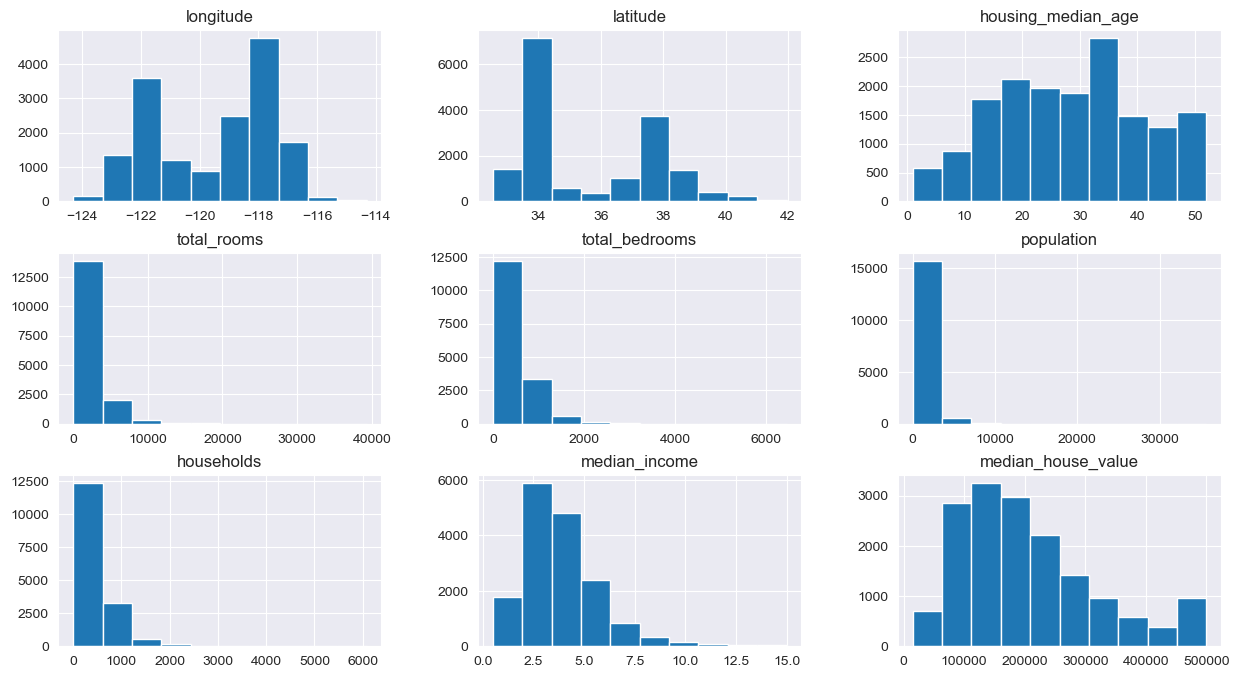

In [79]:
train_data.hist(figsize=(15, 8))

<Axes: >

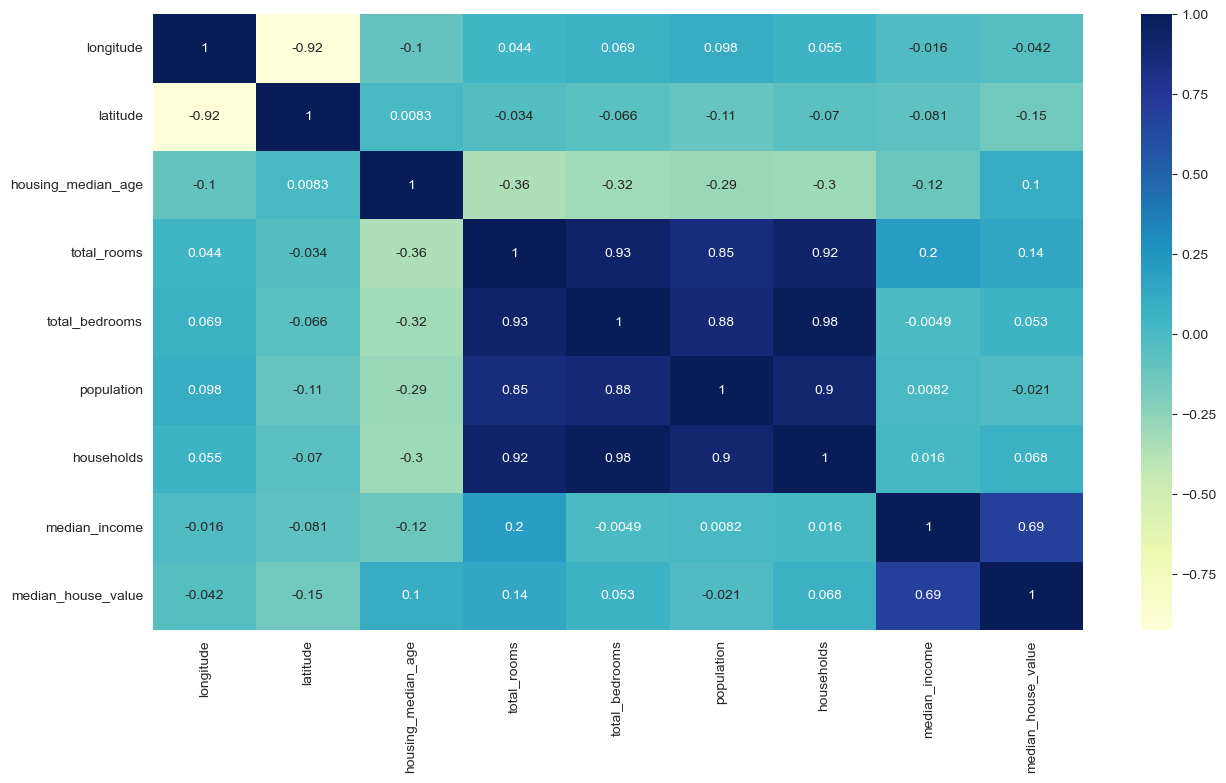

In [80]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [81]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

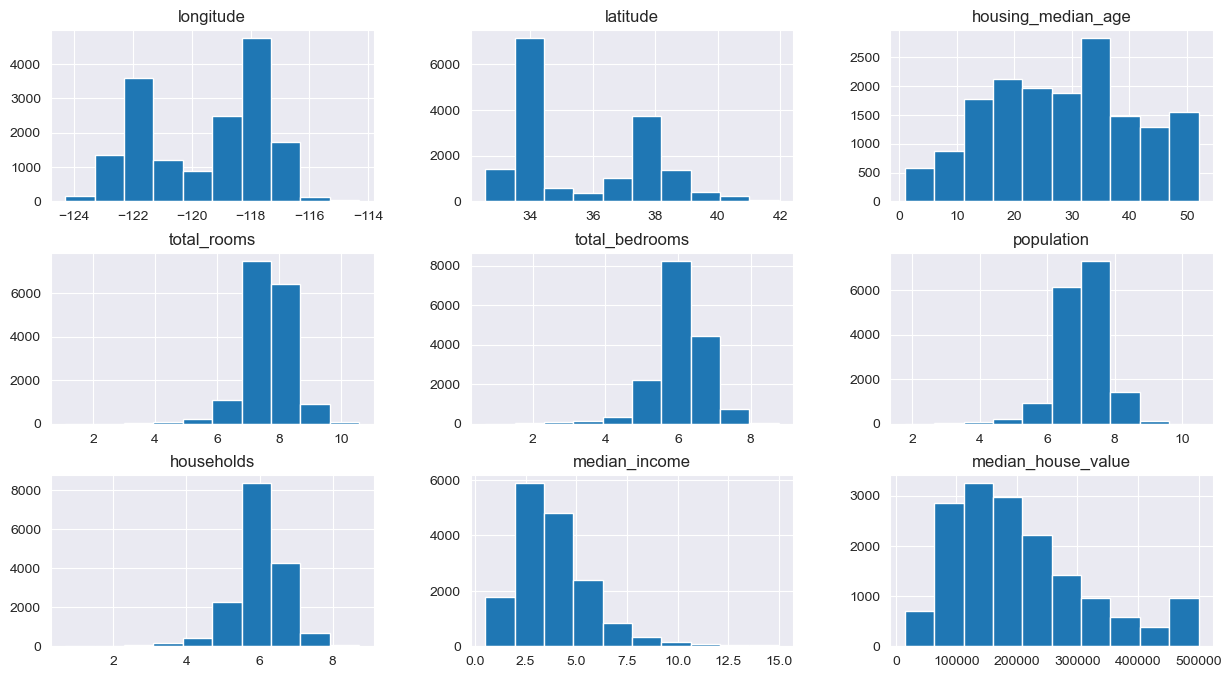

In [82]:
train_data.hist(figsize=(15, 8))

In [83]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

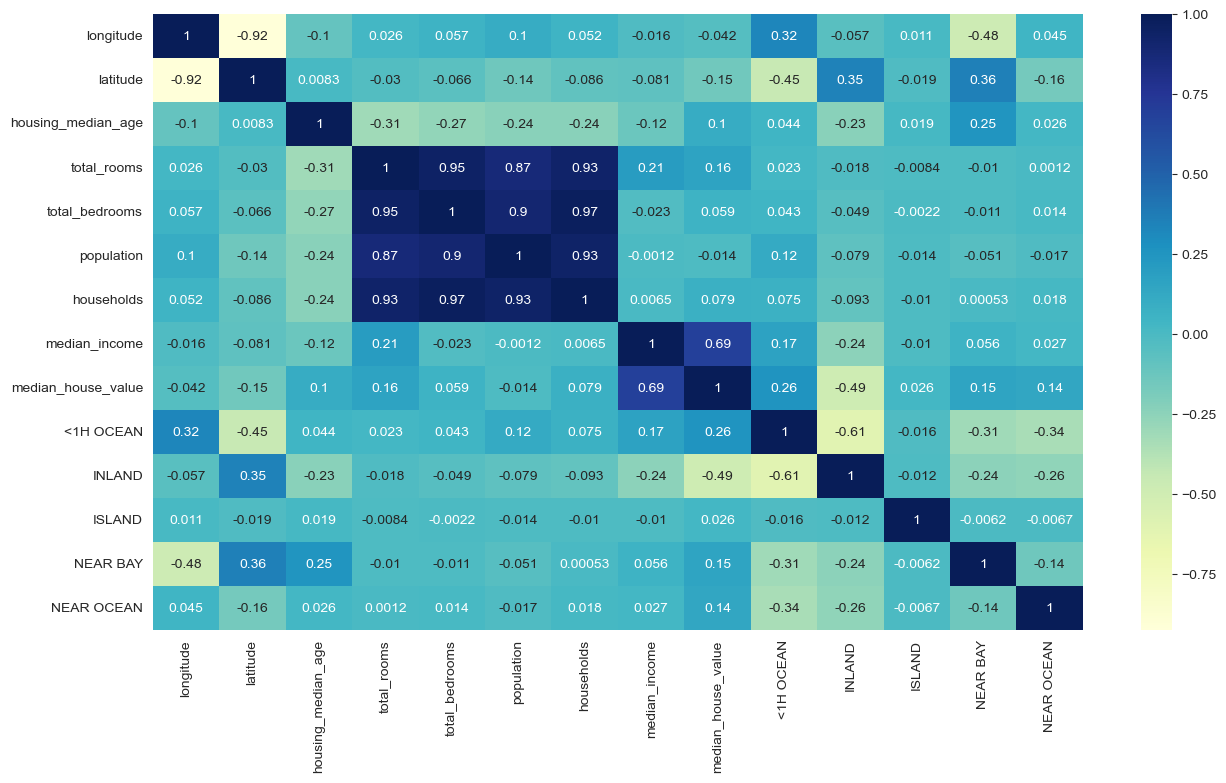

In [84]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

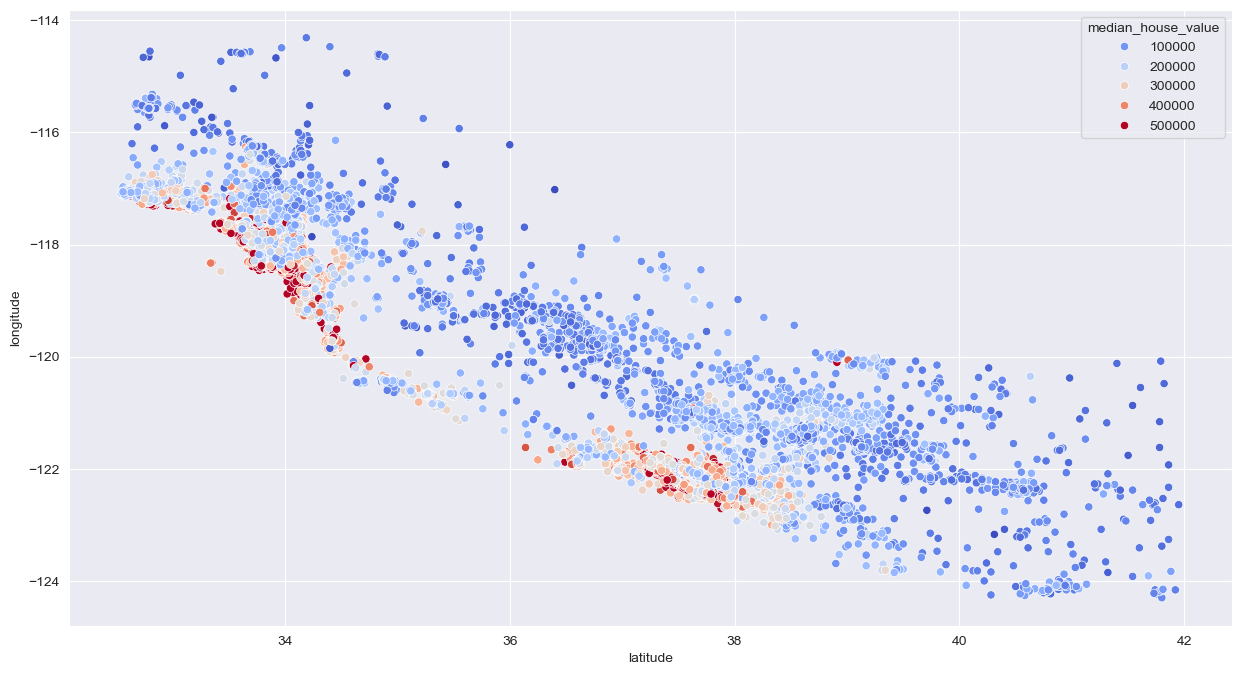

In [85]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x = "latitude", y= "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm")

In [86]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

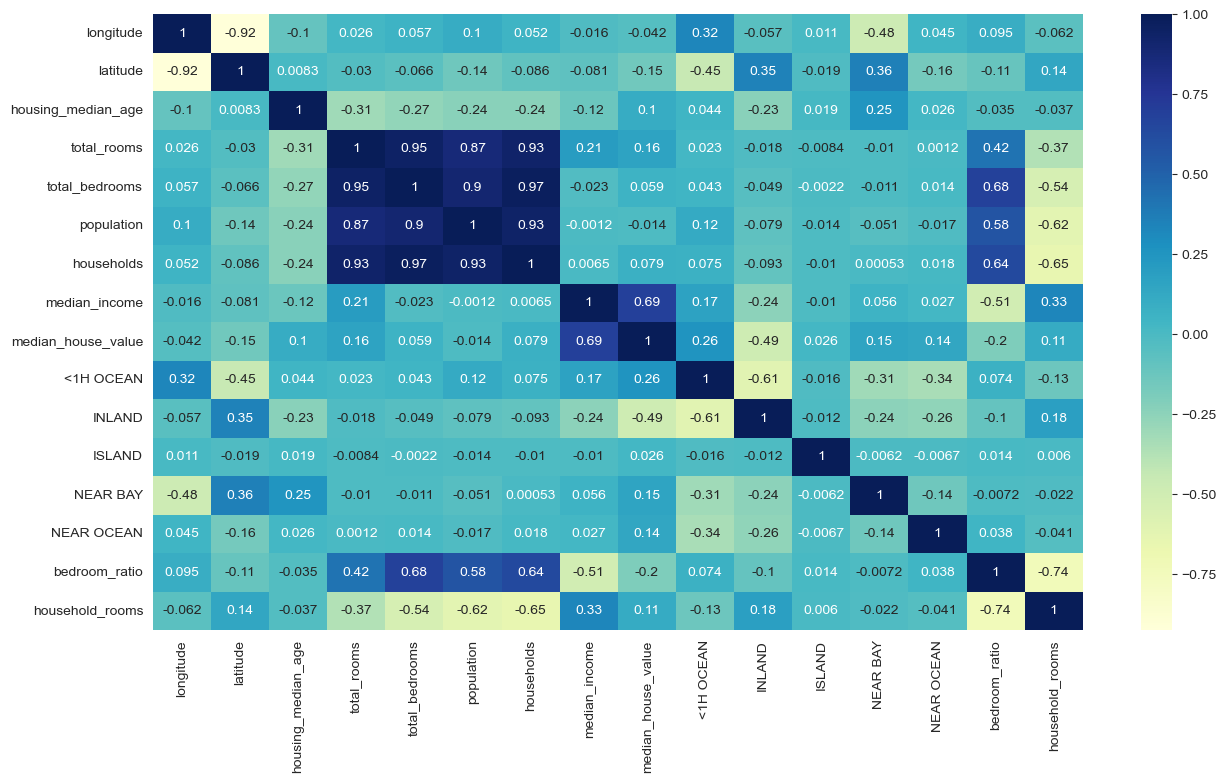

In [87]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap='YlGnBu')

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

# reg.fit(X_train, y_train)
reg.fit(X_train_s, y_train)

LinearRegression()

In [89]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [90]:
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [91]:
X_test = X_test.reindex(columns=scaler.feature_names_in_, fill_value=0)

X_test_s = scaler.transform(X_test)

In [92]:
reg.score(X_test_s, y_test)

0.6618332766687496

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [94]:
forest.score(X_test, y_test)

0.811496552741743

In [95]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    'n_estimators' : [100, 200, 300],
    'min_samples_split' : [2, 4],
    'max_depth' : [None, 4, 8]
}

grid_search = GridSearchCV(forest,
                           param_grid,
                           cv = 5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           n_jobs=-1)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [96]:
best_forest = grid_search.best_estimator_

In [97]:
best_forest.score(X_test_s, y_test)

0.8143607134480404